<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from scipy.special import inv_boxcox

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

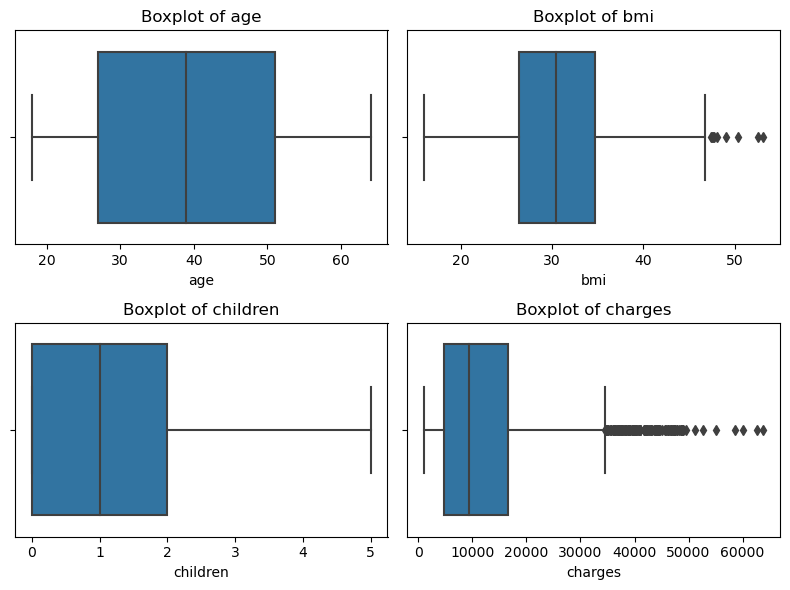

In [6]:
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']

num_cols = 2
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(8, 6))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [7]:
column_name = 'charges' 
# Calculate the IQR (Interquartile Range) for the column
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and access the outlier values for the specified column
outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
print(outliers)


      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [8]:
outliers.groupby('smoker').count()
nosmoke = outliers[outliers['smoker']=='no']
nosmoke

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.80,1,no,southwest,35160.13457
1012,61,female,33.33,4,no,southeast,36580.28216
1206,59,female,34.80,2,no,southwest,36910.60803


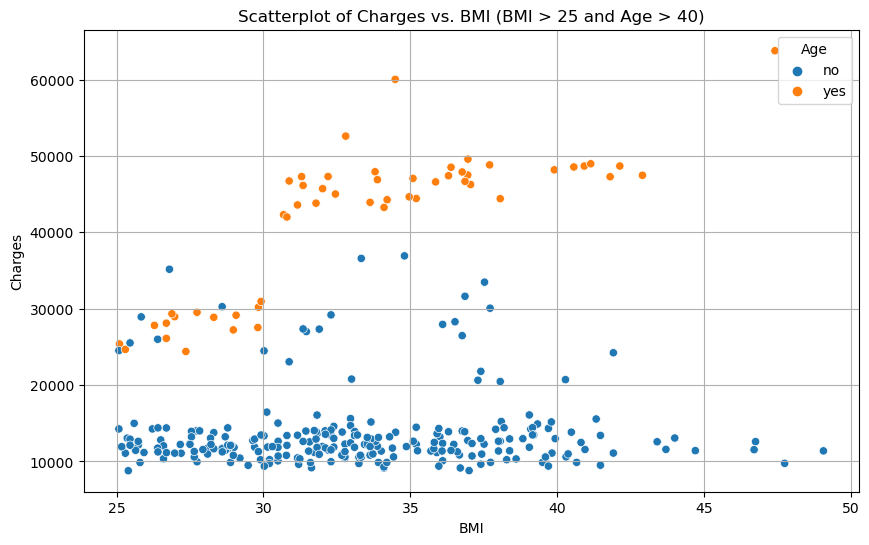

In [9]:
filtered_data = data[(data['bmi'] > 25) & (data['age'] >50)]

plt.figure(figsize=(10, 6))  
scatterplot = sns.scatterplot(data=filtered_data, x='bmi', y='charges', hue='smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatterplot of Charges vs. BMI (BMI > 25 and Age > 40)')
plt.grid(True)

plt.legend(title='Age')

plt.show()


<Axes: >

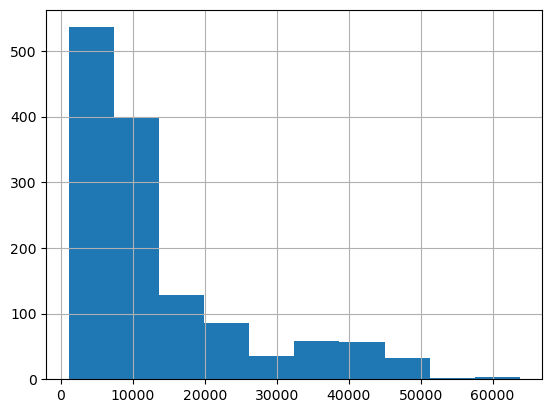

In [10]:
data.charges.hist()

In [11]:
data.groupby('smoker').mean().charges.yes/data.groupby('smoker').mean().charges.no

3.800001458298319

### Apply encoding on "object" type columns

In [12]:
data_ohe = data.copy()
data_ohe['sex']= data_ohe['sex'].apply(lambda x: 1 if x=='male' else 0 )
data_ohe['smoker']= data_ohe['smoker'].apply(lambda x: 1 if x=='yes' else 0 )

In [13]:
data_ohe= pd.get_dummies(data_ohe, columns=['region'], prefix=['region'])


data_ohe.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
data_ohe.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

In [15]:
data_ohe.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


# 2. Objectives
Interpretability and Prediction

Main objective of this analysis is determinig what factors are most important for insurance charges and Also predicting insurance charges

# 3. Linear Regression Models


#### Model 1 (simple linear regression).

In [91]:
X = data_ohe.drop('charges', axis=1)
y = data_ohe['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R-squared (R2): {train_r2:.2f}")
print("\nTesting Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"R-squared (R2): {test_r2:.2f}")

Training Metrics:
Mean Squared Error (MSE): 6142.52
Mean Absolute Error (MAE): 4251.26
R-squared (R2): 0.74

Testing Metrics:
Mean Squared Error (MSE): 5812.10
Mean Absolute Error (MAE): 4145.45
R-squared (R2): 0.77


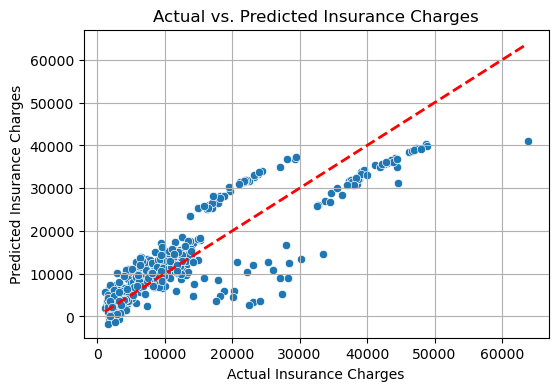

In [92]:
# Scatterplot of actual vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)

# Draw the diagonal line
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', linewidth=2)

plt.show()


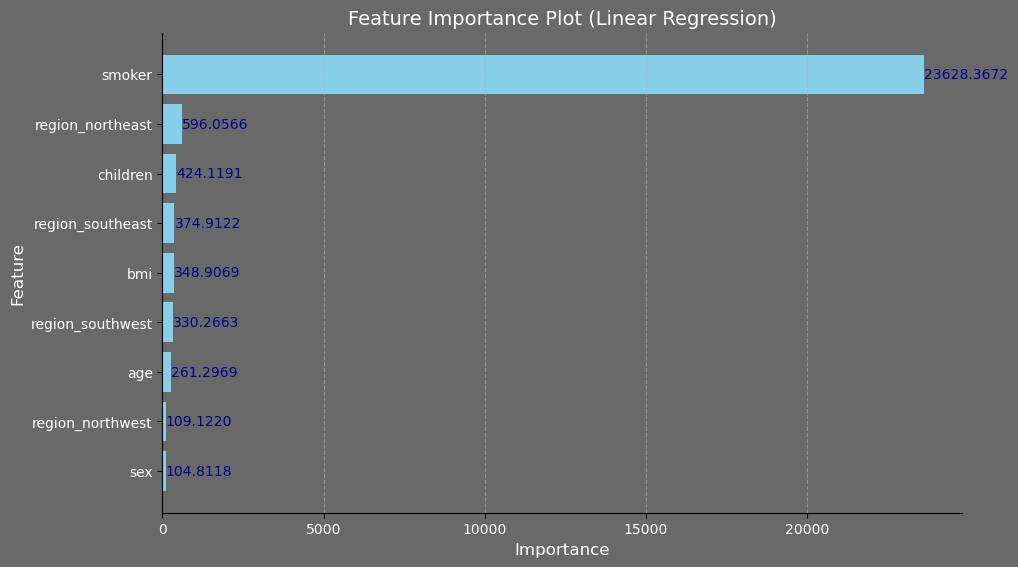

In [93]:
feature_importances = model.coef_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (absolute value) in descending order
feature_importance_df['Importance'] = abs(feature_importance_df['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a figure with a dark background
fig = plt.figure(figsize=(10, 6), facecolor='dimgray')  
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='dimgray') 

bars = ax.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

plt.xlabel('Importance', fontsize=12, color='white') 
plt.ylabel('Feature', fontsize=12, color='white')  
plt.title('Feature Importance Plot (Linear Regression)', fontsize=14, color='white')  
ax.invert_yaxis()  
plt.xticks(fontsize=10, color='white') 
plt.yticks(fontsize=10, color='white')   
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add data labels
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v + 0.002, i, f'{v:.4f}', color='darkblue', fontsize=10, va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


#### Model 2

In [100]:
X = data_ohe.drop('charges', axis=1)
y = data_ohe['charges']

kf = KFold(shuffle=True, random_state=72018, n_splits=4)
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha':np.geomspace(0.005,20 ,30)

}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
#print('Best Score: ',grid.best_score_,'Best Params: ' ,grid.best_params_)
y_predict = grid.predict(X)
print('R2: ',r2_score(y, y_predict))
print('MSE: ',mean_squared_error(y, y_predict, squared=False))


R2:  0.8476983219120677
MSE:  4724.268117773944


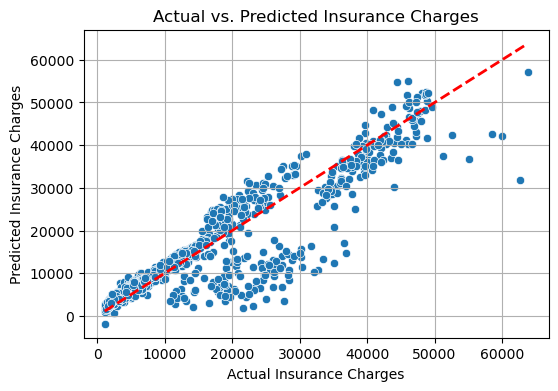

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatterplot of actual vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y, y=y_predict)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)

# Draw the diagonal line
x = np.linspace(min(y), max(y), 100)
plt.plot(x, x, color='red', linestyle='--', linewidth=2)

plt.show()


#### Model 3

In [117]:
bc_result = boxcox(data_ohe.charges)
boxcox_charges = bc_result[0]
lam = bc_result[1]

kf = KFold(shuffle=True, random_state=72018, n_splits=4)

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha':np.geomspace(0.005,20 , 30)

}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, boxcox_charges)
#print(grid.best_score_, grid.best_params_)
y_predict = grid.predict(X)
#print('R2: ',r2_score(boxcox_charges, y_predict))
#print('MSE: ',mean_squared_error(y, y_predict, squared=False))
y_predict1 = inv_boxcox(y_predict,lam)
r2_score(y,y_predict1)

R2:  0.842037009960855
MSE:  17953.403552959728


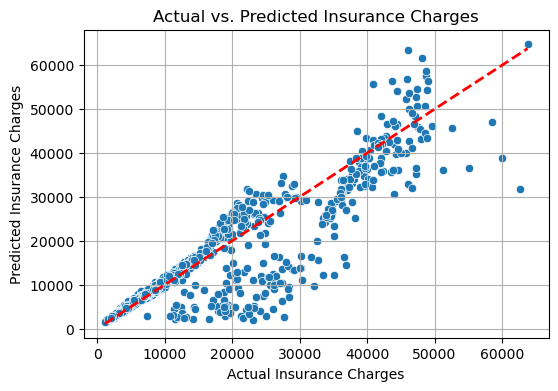

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatterplot of actual vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y, y=y_predict1)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)

# Draw the diagonal line
x = np.linspace(min(y), max(y), 100)
plt.plot(x, x, color='red', linestyle='--', linewidth=2)

plt.show()


#### Model 4

In [125]:
x = data_ohe[['age', 'bmi', 'children','smoker']]
y = data_ohe.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test =train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred =Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(r2_score(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))


0.8812595703345231
0.8323303066639052


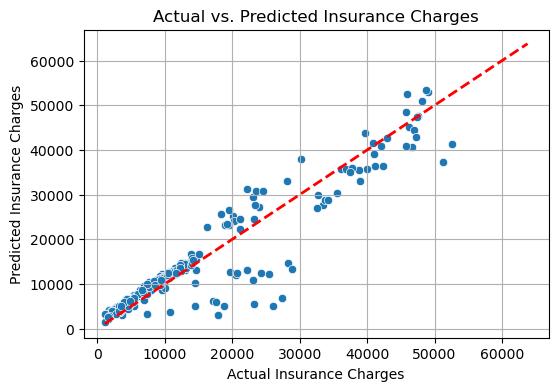

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatterplot of actual vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)

# Draw the diagonal line
x = np.linspace(min(y), max(y), 100)
plt.plot(x, x, color='red', linestyle='--', linewidth=2)

plt.show()


# 4. Insights and key findings


1. Smoking is the most important factor in this dataset for the increase in health insurance charges. On average people who smoke have 3.8 times more insurance charges then people who don't.
2. We analyzed the outliers of 'charges' and found out that out of 139 only 3 people were non smokers, who had extreme high charges for insurance and that was because they had both high bmi and very old age(60 approximately).

# 5. Next Steps


1. A better r2 score and mse could be achieved by using other regression models such as random forest or decision tree regression
2. A better prediction could be achieved if this dataset had other important features as well such as 'Disease'

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
